In [32]:
import matplotlib.pyplot as plt
import numpy as np

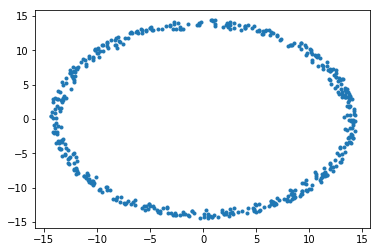

In [34]:
rad = 15 #Radio
N = 500#Numero de puntos

#Generar anillo
theta = np.random.uniform(0.0, 2.0*np.pi, N)
r = (rad-2)+ np.sqrt(np.random.uniform(0, 2, N))
x_a =  r * np.cos(theta)
y_a = r * np.sin(theta)


plt.plot(x_a,y_a,'.')

In [35]:
def distancia(x_0,x_1,y_0,y_1):
    d = np.sqrt((x_1 - x_0)**2 + (y_1-y_0)**2)
    return d

In [36]:
dis_DD=[]  #Contador
minimo= 40 #Lo proponemos, como la distancia mayor entre puntos
for i in range(N):
    for j in range(i+1,N):
        d_dd = distancia(x_a[i],x_a[j],y_a[i],y_a[j])
        dis_DD.append(d_dd)
        if d_dd<minimo:      #Para obtener los puntos que tienen la minima distancia
            #print(i,j)
            iN=i              #Guardar el elemento que minimiza esta distancia
            jN=j
            minimo=d_dd       #Reescribimos la distancia para que sea la menor

In [37]:
#Vector que une los puntos que tienen la minimo distancia
d_x=x_a[iN]-x_a[jN]
d_y=y_a[iN]-y_a[jN]

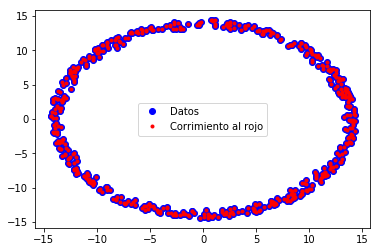

In [43]:
#Entonces redefinimmos los nuevos puntos (que seran los corridos al rojo) y graficamos.
c=0.1 #Factor de velocidad
x_r= x_a + c*d_x
y_r= y_a + c*d_y
plt.plot(x_a,y_a,'o',color='blue', label= 'Datos')
plt.plot(x_r,y_r,'.',color='red', label= 'Corrimiento al rojo')
plt.legend()

In [44]:
#contador
dis_DD = [] #DD
dis_RR =[] #RR
dis_DR = []     #DR

In [45]:
for i in range(N):
    for j in range(i+1,N):
        d_dd = distancia(x_a[i],x_a[j],y_a[i],y_a[j])
        d_rr = distancia(x_r[i],x_r[j],y_r[i],y_r[j])
        dis_DD.append(d_dd)
        dis_RR.append(d_rr)
        #print (d_p)
        
#Distancia de los datos a los random
for  i in  range(N):
        for  j  in  range(N):
            d_dr = distancia(x_a[i],x_r[j],y_a[i],y_r[j])
            dis_DR.append(d_dr)

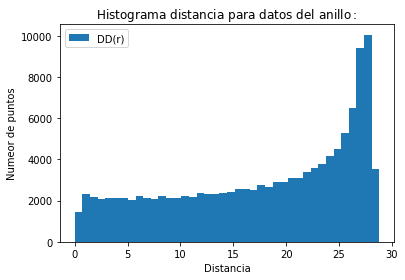

In [61]:
DD,dato_bin,n = plt.hist((dis_DD),bins=40, label='DD(r)')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  distancia\ para\ datos\ del \ anillo:}$')
plt.legend()
plt.show()

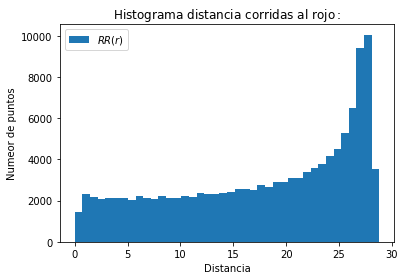

In [62]:
RR,random_bin,m = plt.hist((dis_RR),bins=40, label='$RR(r)$')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  distancia\ corridas\ al\ rojo:}$')
plt.legend()
plt.show()

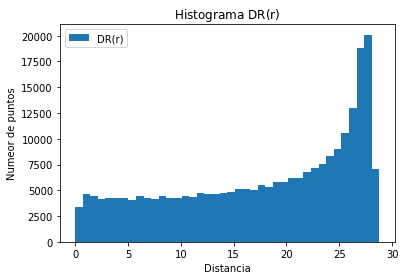

In [55]:
DR,datorandom_bin,p = plt.hist((dis_DR),bins=40, label='DR(r)')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DR(r)}$')
plt.legend()
plt.show()

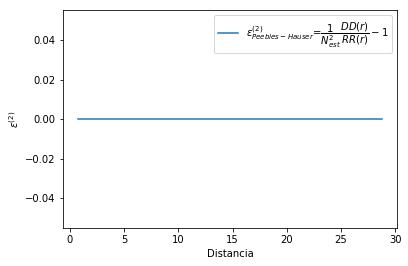

In [56]:
Nest=1
plt.plot(dato_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

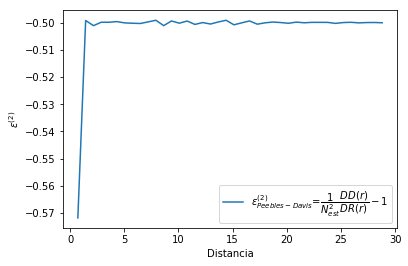

In [57]:
plt.plot(dato_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{DR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

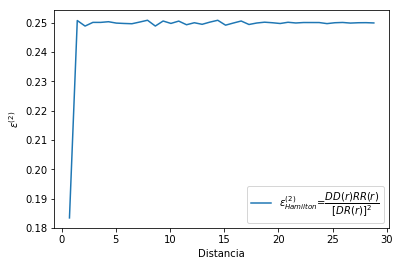

In [58]:
plt.plot(dato_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$=$\dfrac{DD(r)RR(r)}{[DR(r)]^2}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

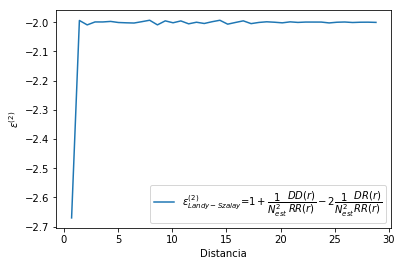

In [59]:
plt.plot(dato_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$=$1+\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-2\dfrac{1}{N_{est}^{2}}\dfrac{DR(r)}{RR(r)}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

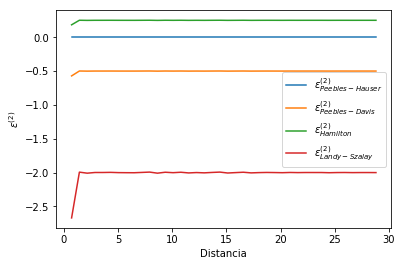

In [60]:
plt.plot(dato_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$'))
plt.plot(dato_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$'))
plt.plot(dato_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$'))
plt.plot(dato_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()